<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/The%20Models/Subject_based_RNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters
import random

In [0]:
import random
from sklearn.model_selection import train_test_split

In [4]:
subj_1 = datafetch.fetch_subject(12)
subj_1.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [0]:
def selector_desing(subject):
  selector = []
  for i in subject:
    for j in range(1,5):
      for k in range(18):
        selector.append((i,j,k))

  selector = np.array(selector)
  np.random.shuffle(selector)

  return selector

In [0]:
def selector_desing_test_data(subject):
  selector = []
  for i in subject:
    for j in range(1,5):
      for k in range(18,25):
        selector.append((i,j,k))

  selector = np.array(selector)
  np.random.shuffle(selector)
  return selector

In [7]:
selector = selector_desing([1])
selector.shape

(72, 3)

In [0]:
global indexes
global test_data_indexes
global selector
global selector_test_data
selector_test_data = selector_desing_test_data([1])
selector = selector_desing([1])
indexes = [i for i in range(18)]
test_data_indexes = [i for i in range(18,25)]

In [0]:
def data_loader(select):
  
  global indexes

  this_trail = select[2]
  index = select[2]
  
  Indexes = indexes.copy()
  Indexes.pop(index)  # so, now Indexes is the array [0,1,2,...,17] with out the this_trial index

  samples = random.sample(Indexes, 11)
  samples += [this_trail]


  data =  np.mean(subj_1['train_data_class{}'.format(select[1])][samples], axis=0)
  label = select[1]
  return data, label

In [0]:
def data_loader_test_data(select):
  
  global test_data_indexes

  this_trail = select[2]
  index = select[2]-18
  
  Indexes = test_data_indexes.copy()

  Indexes.pop(index)  # so, now Indexes is the array [18,19,...,24] with out the this_trial index


  samples = random.sample(Indexes, 3)
  samples += [this_trail]


  data =  np.mean(subj_1['train_data_class{}'.format(select[1])][samples], axis=0)
  label = select[1]
  return data, label

In [0]:
from plotters import EEG_plotter

In [0]:
EEG_plotter(40,data)
#The meaned data

In [0]:
EEG_plotter(40,subj_1['train_data_class{}'.format(select[1])][select[2]] )

# The Unmeaned data

In [0]:
def batch_loader(batch=[0,100]):
  # the batch=[a,b] can be 0...18000*4
  
  Label = []
  Data = []
  global selector
  

  for i in range(batch[0], batch[1]):
    data, label = data_loader(selector[int(i%len(selector))])
    Data.append(data)
    Label.append(label)

  Data = np.array(Data)
  Label = np.array(Label)

  return Data, Label

In [0]:
def batch_loader_show(label, batch=[0,100]):
  # the batch=[a,b] can be 0...18000*4
  
  Label = []
  Data = []
  global selector

  for i in range(batch[0], batch[1]):
    new_selector = selector[selector[:,1]==label[int(i%len(selector))]]
    data, label_ = data_loader(new_selector[int(i%len(new_selector))])
    Data.append(data)
    Label.append(label_)

  Data = np.array(Data)
  Label = np.array(Label)

  return Data, Label

In [0]:
data, label = batch_loader()

In [14]:
label, label.shape

(array([2, 4, 2, 2, 4, 1, 3, 4, 2, 2, 2, 4, 3, 4, 1, 4, 1, 2, 3, 1, 1, 3,
        2, 1, 1, 3, 1, 4, 1, 1, 2, 2, 4, 1, 1, 1, 2, 3, 1, 4, 3, 1, 3, 1,
        3, 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 4, 3, 2, 3, 3, 1, 2, 3, 4, 4, 4,
        3, 1, 3, 4, 4, 4, 2, 4, 2, 2, 4, 1, 3, 4, 2, 2, 2, 4, 3, 4, 1, 4,
        1, 2, 3, 1, 1, 3, 2, 1, 1, 3, 1, 4]), (100,))

In [15]:
label_

NameError: ignored

In [73]:
data_.shape

(100, 7200, 63)

In [0]:
data_ , label_ = batch_loader_show(label)

In [48]:
label_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
def batch_loader_test_data(batch=[0,100]):
  # the batch=[a,b] can be 0...35*4
  
  Label = []
  Data = []
  global selector_test_data
  global selector
  

  for i in range(batch[0], batch[1]):
    data, label = data_loader_test_data(selector_test_data[int(i%len(selector_test_data))])
    '''
    L = len(selector[selector[:,1]==label])
    data_for_mean = []
    for j in range(6):
      data_, label_ = data_loader(selector[selector[:,1]==label][int((i+j)%L)])
      data_for_mean.append(data_)
      data = np.mean(data_for_mean, axis=0)
    '''
    Data.append(data)
    Label.append(label)

  Data = np.array(Data)
  Label = np.array(Label)

  return Data, Label

In [0]:
data, label  = batch_loader()

In [18]:
data.shape, label.shape

((100, 7200, 63), (100,))

# The Model

In [0]:
from tensorflow import keras

In [20]:
input_ = keras.layers.Input(shape=(None, 63), name='inputtt')
hidden1 = keras.layers.TimeDistributed(keras.layers.Dense(50, activation="relu"))(input_)
hidden2 = keras.layers.TimeDistributed(keras.layers.Dense(40, activation="relu"))(hidden1)
hidden3 = keras.layers.TimeDistributed(keras.layers.Dense(30, activation="relu"))(hidden2)
hidden3_0 = keras.layers.GRU(20)(hidden3)
hidden3_1 = keras.layers.Dense(10, activation="relu")(hidden3_0)
hidden3_2 = keras.layers.Dense(5, activation="relu")(hidden3_1)

hidden4 = keras.layers.TimeDistributed(keras.layers.Dense(40, activation="relu"))(hidden3)
hidden5 = keras.layers.TimeDistributed(keras.layers.Dense(63, activation="relu"))(hidden4)
output = keras.layers.Dense(1, name="time_series_output")(hidden5)
aux_output = keras.layers.Dense(4, activation='softmax', name="label_output")(hidden3_2)
model = keras.Model(inputs=[input_], outputs=[output,
aux_output])



keras.utils.plot_model(model)
from IPython.display import Image
Image('model.png')


model.compile(optimizer='adam', 
              loss = ['MSE', 'sparse_categorical_crossentropy'],
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputtt (InputLayer)            [(None, None, 63)]   0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 50)     3200        inputtt[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 40)     2040        time_distributed[0][0]           
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, None, 30)     1230        time_distributed_1[0][0]         
______________________________________________________________________________________________

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(1))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

# This got %34 accuracy

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
#model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(20))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

# This got %28  accuracy

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
#model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(20))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

### It Got 100% accuracy with pusing method

In [0]:
model.summary()


In [0]:
"""

over_sample = 1
intervals = [[1000*i,1000*(i+1)] for i in range(10)]
for epoch in range(1):
  for interval in intervals:
    data, label = batch_loader(interval)
    data_show = batch_loader(interval) #used as the first output
    data_test, label_test=  batch_loader_test_data()
    model.fit(data[:,::over_sample,:], (data_show, label-1), epochs=2, validation_data=(data_test[:,::over_sample,:], label_test-1))
    print('')
    print('############################')
    print('############################')
    print('interval:{}    and    epoch:{}'.format(interval, epoch))
    print('############################')
    print('############################')
    print('')
    
    """

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics= ['accuracy'])

In [77]:
data_show.shape

(1000, 7200, 63)

In [21]:
## For the manual Model

over_sample = 1
intervals = [[1000*i,1000*(i+1)] for i in range(3)]
for epoch in range(1):
  for interval in intervals:

    data, label = batch_loader(interval)
    data_show, label_ = batch_loader_show(label, interval) #used as the first output
    data_test, label_test=  batch_loader_test_data()

    model.fit(data[:,::over_sample,:], (data_show, label-1), epochs=10, validation_data=(data_test[:,::over_sample,:], label_test-1))
    print('')
    print('############################')
    print('############################')
    print('interval:{}    and    epoch:{}'.format(interval, epoch))
    print('############################')
    print('############################')
    print('')

Epoch 1/10
32/32 [==============================] - 9s 281ms/step - loss: 23.4998 - time_series_output_loss: 22.1750 - label_output_loss: 1.3248 - time_series_output_accuracy: 6.6138e-09 - label_output_accuracy: 0.3100 - val_loss: 25.5453 - val_time_series_output_loss: 23.7806 - val_label_output_loss: 1.7647 - val_time_series_output_accuracy: 0.2540 - val_label_output_accuracy: 0.0800
Epoch 2/10
32/32 [==============================] - 8s 259ms/step - loss: 22.3819 - time_series_output_loss: 21.3055 - label_output_loss: 1.0764 - time_series_output_accuracy: 6.6138e-09 - label_output_accuracy: 0.4600 - val_loss: 19.3630 - val_time_series_output_loss: 17.0583 - val_label_output_loss: 2.3047 - val_time_series_output_accuracy: 0.2543 - val_label_output_accuracy: 0.1500
Epoch 3/10
32/32 [==============================] - 8s 261ms/step - loss: 22.0828 - time_series_output_loss: 21.2204 - label_output_loss: 0.8624 - time_series_output_accuracy: 6.6138e-09 - label_output_accuracy: 0.6050 - val

In [0]:
data_test, label_test=  batch_loader_test_data()

In [0]:
Data_test, Label_test = batch_loader()

In [23]:
model.evaluate(Data_test, Label_test-1)

#y_pred = model.predict(data_test)
#y_pred = np.argmax(y_pred, axis=1) +1

4/4 [==============================] - 0s 73ms/step - loss: 4.5266 - time_series_output_loss: 4.5246 - label_output_loss: 0.0020 - time_series_output_accuracy: 0.2684 - label_output_accuracy: 1.0000


[4.526612281799316,
 4.524601936340332,
 0.002009647898375988,
 0.2684139013290405,
 1.0]

In [0]:
y_pred = model.predict(data_test)

In [33]:
np.shape(y_pred[0]), np.shape(y_pred[1])

((100, 7200, 1), (100, 4))

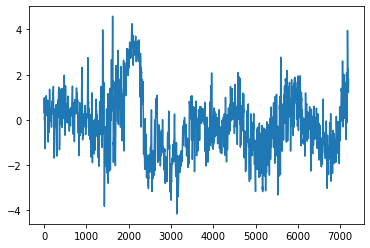

In [39]:
plt.plot(y_pred[0][19,:,0])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(label_test, y_pred)

array([[23,  0,  0,  0],
       [ 0, 27,  0,  0],
       [ 0,  0, 26,  0],
       [ 0,  0,  0, 24]])

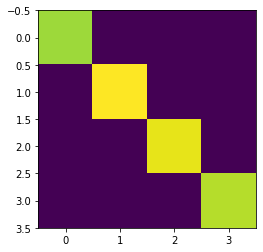

In [144]:
plt.imshow(mat)
mat


In [0]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(label_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        24

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

